## IMPORT AND EXPLORING THE DATA

In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [25]:
# Getting the data
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## PREPROCESSING THE DATA

In [27]:
data.dropna(inplace=True)

In [28]:
data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data['population'] = np.log(data['population'] + 1)
data['households'] = np.log(data['households'] + 1)

data = data.join(pd.get_dummies(data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis=1)

data['beroom_ratio'] = data['total_bedrooms'] / data['total_rooms']
data['households_rooms'] = data['total_rooms'] / data['households']

## VISUALIZING THE DATA

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'beroom_ratio'}>,
        <Axes: title={'center': 'households_rooms'}>]], dtype=object)

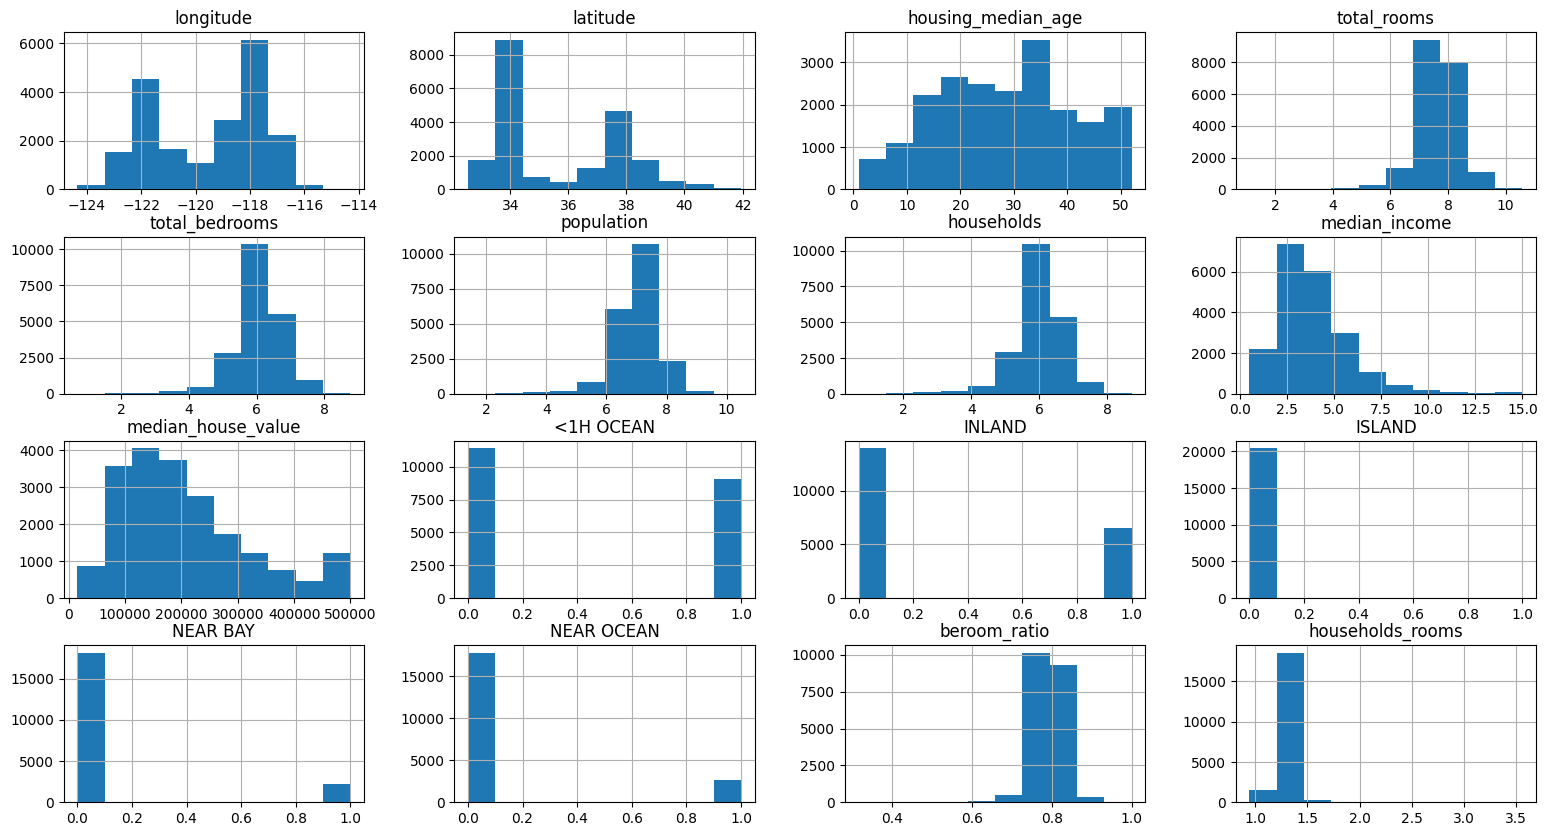

In [43]:
data.hist(figsize=(19,10))

<Axes: xlabel='latitude', ylabel='longitude'>

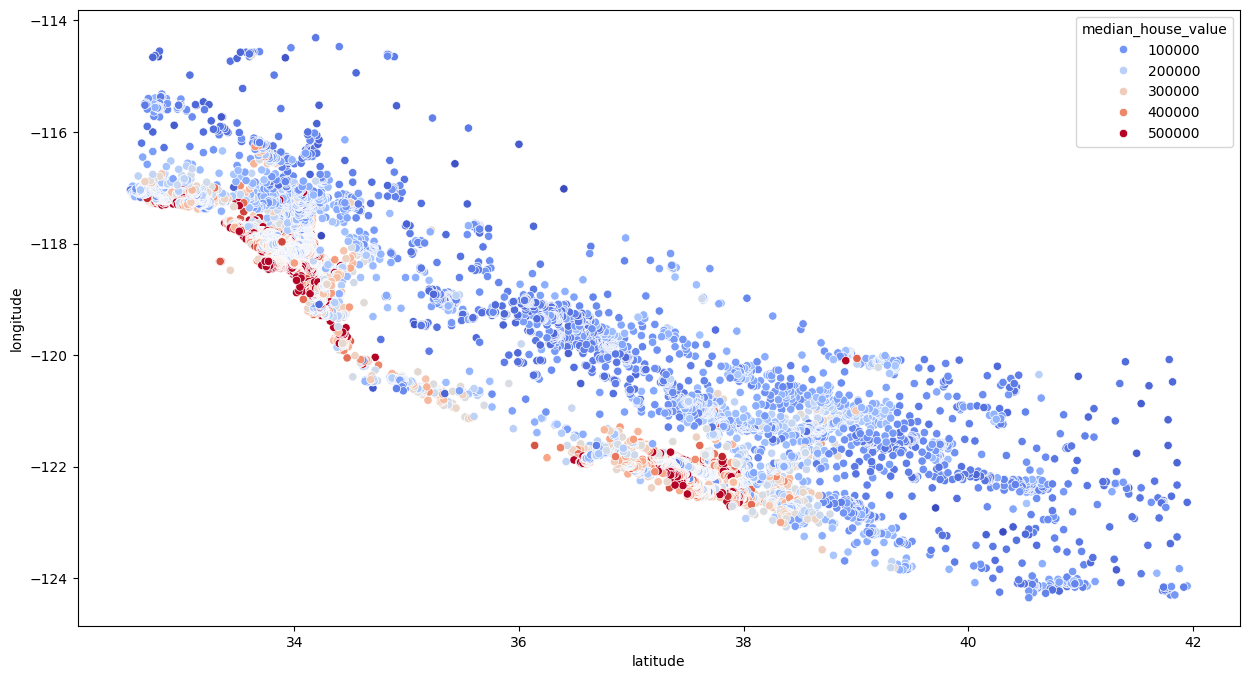

In [33]:
# Visualizing the correlation between ocean_proximity and the median_house_value
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=data, hue='median_house_value', palette="coolwarm")

<Axes: >

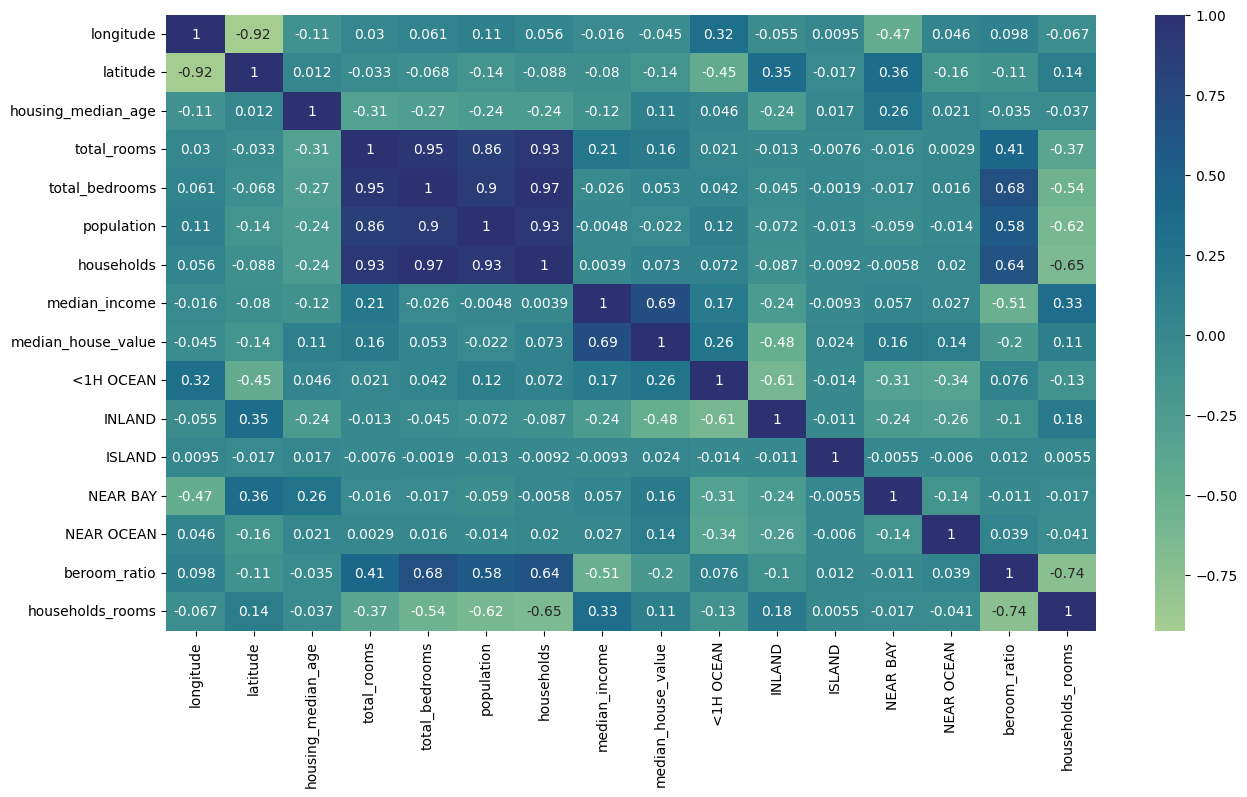

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="crest")
# Concluding that total_rooms and bedroom_ratio can be an intersting factor

## LINEAR REGRESSION MODEL

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Seperating the house value column
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
reg = LinearRegression()

reg.fit(X_train,y_train)
print(reg.score(X_train, y_train))
print(reg.coef_)

0.6711222784528469
[ -29181.01275885  -28355.84372056    1079.65287804  -89043.40444297
  148330.45915183  -90158.59908359   49526.82310899   42519.7603033
  -16509.77242794  -49353.87555687  107897.4084431   -24326.39323622
  -17707.36722208 -378320.18462203    1945.7858228 ]


In [36]:
test_data = X_test.join(y_test)


In [37]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,beroom_ratio,households_rooms,median_house_value
8333,-118.31,33.93,37.0,7.156956,5.501258,6.748760,5.521461,4.2917,1,0,0,0,0,0.768659,1.296207,127900.0
7343,-118.14,33.96,38.0,6.381816,4.941642,6.431331,4.890349,2.1731,1,0,0,0,0,0.774332,1.304982,143800.0
18515,-122.02,36.98,21.0,7.303170,5.978886,6.892642,5.942799,2.1734,0,0,0,0,1,0.818670,1.228911,187500.0
9070,-118.14,34.71,32.0,7.060476,5.517453,6.378426,5.602119,1.1917,0,1,0,0,0,0.781456,1.260322,86900.0
16835,-122.51,37.58,20.0,4.174387,3.091042,4.094345,3.091042,2.2375,0,0,0,0,1,0.740478,1.350479,450000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20420,-118.83,34.18,23.0,8.639057,6.668228,7.626083,6.605298,6.3586,1,0,0,0,0,0.771870,1.307898,348300.0
204,-122.23,37.78,44.0,7.758333,6.716595,7.942362,6.622736,1.6009,0,0,0,1,0,0.865726,1.171469,118100.0
419,-122.26,37.89,52.0,8.032360,6.204558,6.913737,6.137727,6.3810,0,0,0,1,0,0.772445,1.308686,342200.0
6599,-118.16,34.17,52.0,7.085064,5.433722,6.556778,5.402677,3.1741,1,0,0,0,0,0.766926,1.311399,163800.0


In [38]:
reg.score(X_test,y_test)

0.6632236539066794